<center><h1>Principal Component Analysis, EDA on E-Commerce website</h1></center>

In [141]:
import numpy as np
import pandas as pd

In [142]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

<div id="Understanding the dataset">
    <h2>Understanding the dataset</h2>
</div>


This E-Commerce website dataset Contains information from https://www.kaggle.com/smokingkrils/ecommerce-platform-analysis-and-prediction
 

This Dataset contains data of Indian E-commerce website that has the user data such as gender,age,location and 71 other columns of data about the activity of the user in the website and which website they would recommend to their friend.We could analyse and find which factors affect the recomendation of the users.so we have a problem of dimensionality reduction.PCA could be used to isolate the columns that affect change at a higher level when it comes to user's website recommendation to his/her friends. 


In this notebook we perform dimensionality reduction , to find the factors for user's  recommendation of websites.

In [143]:
data = pd.read_excel('E:\Datasets\Ecommerce new\E-commerce.xlsx')

In [144]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
4 What is the Pin Code of where you shop online from?,269.0,220465.747212,140524.341051,110008.0,122018.0,201303.0,201310.0,560037.0


In [145]:
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [146]:
pd.options.display.max_columns = None

In [147]:
city = data['3 Which city do you shop online from?']

<div id="Exploratory Data Analysis">
    <h2>Exploratory Data Analysis</h2>
</div>


We can analyse the categorical data of E-Commerce website listed below

1)Location

2)Gender of user

3)Usage Time

4)Recommendation of user(Target)

5)Preferred Payment Option

6)Discovery of website/link source



Most of the traffic appears to be from certain locations upnorth and this could be Plotted in India map for clarity.

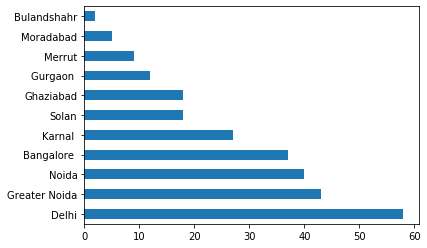

In [148]:
data['3 Which city do you shop online from?'].value_counts().plot(kind='barh')

Plotting of locations in the indian map could be done using Geo-pandas library.

In [149]:
city.unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

<h2>1)Location</h2>

Location of user can be plotted by getting the lattitude and longitude of the City using Nominatim and it can plotted using Geo Pandas

In [150]:
from geopy.geocoders import Nominatim
i = ('Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr')
new_data=[]
place=[]
for address in i:
           
            geolocator = Nominatim(user_agent="Your_Name")
            location =  geolocator.geocode(address)
            print(location.address)
            print((location.latitude, location.longitude))
            new_data.append((location.latitude, location.longitude))
            place.append((location.address))
            
            
cols =['lat','lon']            
location =pd.DataFrame(new_data, columns=cols)

cols1=['city']            
Place =pd.DataFrame(place, columns=cols1)
            
                
                    
      

Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India
(28.6517178, 77.2219388)
Greater Noida, Gautam Buddha Nagar, Uttar Pradesh, 201310, India
(28.4670734, 77.5137649)
Karnal, Haryana, 132001, India
(29.6803266, 76.9896254)
Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
(12.9791198, 77.5912997)
Noida, Dadri, Gautam Buddha Nagar, Uttar Pradesh, 201301, India
(28.5707841, 77.3271074)
Solan, Himachal Pradesh, India
(30.92589585, 77.08200509063624)
Moradabad, Uttar Pradesh, India
(28.8638424, 78.80577833091104)
Gurgaon, Gurugram, Haryana, India
(28.42826235, 77.00270014657752)
Merrut-Bulandsehar Road, Hapur, Uttar Pradesh, 245101, India
(28.6961427, 77.7836134)
Ghaziabad, Uttar Pradesh, India
(28.711241, 77.4445372)
Bulandshahr, Uttar Pradesh, India
(28.38886085, 77.97479772598118)


In [151]:
print(location)

          lat        lon
0   28.651718  77.221939
1   28.467073  77.513765
2   29.680327  76.989625
3   12.979120  77.591300
4   28.570784  77.327107
5   30.925896  77.082005
6   28.863842  78.805778
7   28.428262  77.002700
8   28.696143  77.783613
9   28.711241  77.444537
10  28.388861  77.974798


We only need the city names to perform a left join with the city data in the original dataset

In [152]:
print(Place)


                                                 city
0   Delhi, Kotwali Tehsil, Central Delhi, Delhi, 1...
1   Greater Noida, Gautam Buddha Nagar, Uttar Prad...
2                      Karnal, Haryana, 132001, India
3   Bengaluru, Bangalore North, Bangalore Urban, K...
4   Noida, Dadri, Gautam Buddha Nagar, Uttar Prade...
5                      Solan, Himachal Pradesh, India
6                     Moradabad, Uttar Pradesh, India
7                   Gurgaon, Gurugram, Haryana, India
8   Merrut-Bulandsehar Road, Hapur, Uttar Pradesh,...
9                     Ghaziabad, Uttar Pradesh, India
10                  Bulandshahr, Uttar Pradesh, India


In [153]:
Place[['City?','0','1','2','3','4']] = Place.city.apply(lambda x: pd.Series(str(x).split(",")))

In [154]:
Place


,city,City?,0,1,2,3,4
0,"Delhi, Kotwali Tehsil, Central Delhi, Delhi, 1...",Delhi,Kotwali Tehsil,Central Delhi,Delhi,110006,India
1,"Greater Noida, Gautam Buddha Nagar, Uttar Prad...",Greater Noida,Gautam Buddha Nagar,Uttar Pradesh,201310,India,NaN
2,"Karnal, Haryana, 132001, India",Karnal,Haryana,132001,India,NaN,NaN
3,"Bengaluru, Bangalore North, Bangalore Urban, K...",Bengaluru,Bangalore North,Bangalore Urban,Karnataka,India,NaN
4,"Noida, Dadri, Gautam Buddha Nagar, Uttar Prade...",Noida,Dadri,Gautam Buddha Nagar,Uttar Pradesh,201301,India
5,"Solan, Himachal Pradesh, India",Solan,Himachal Pradesh,India,NaN,NaN,NaN
6,"Moradabad, Uttar Pradesh, India",Moradabad,Uttar Pradesh,India,NaN,NaN,NaN
7,"Gurgaon, Gurugram, Haryana, India",Gurgaon,Gurugram,Haryana,India,NaN,NaN
8,"Merrut-Bulandsehar Road, Hapur, Uttar Pradesh,...",Merrut-Bulandsehar Road,Hapur,Uttar Pradesh,245101,India,NaN
9,"Ghaziabad, Uttar Pradesh, India",Ghaziabad,Uttar Pradesh,India,NaN,NaN,NaN


In [155]:
Places= Place[['City?']]

In [156]:
City_area = Places.replace(to_replace ="Bengaluru",
                 value ="Bangalore")
City_area_new = City_area.replace(to_replace ="Merrut-Bulandsehar Road",
                 value ="Merrut")

In [157]:
City_area_new


,City?
0,Delhi
1,Greater Noida
2,Karnal
3,Bangalore
4,Noida
5,Solan
6,Moradabad
7,Gurgaon
8,Merrut
9,Ghaziabad


In [158]:
location_data = pd.concat([City_area_new,location], axis=1)

In [159]:
location_data

,City?,lat,lon
0,Delhi,28.651718,77.221939
1,Greater Noida,28.467073,77.513765
2,Karnal,29.680327,76.989625
3,Bangalore,12.979120,77.591300
4,Noida,28.570784,77.327107
5,Solan,30.925896,77.082005
6,Moradabad,28.863842,78.805778
7,Gurgaon,28.428262,77.002700
8,Merrut,28.696143,77.783613
9,Ghaziabad,28.711241,77.444537


In [160]:
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [161]:
data['3 Which city do you shop online from?'] = data['3 Which city do you shop online from?'].str.upper()
location_data['City?'] = location_data['City?'].str.upper()
data['3 Which city do you shop online from?']  = data['3 Which city do you shop online from?'] .str.strip()



In [162]:
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [163]:
location_data

,City?,lat,lon
0,DELHI,28.651718,77.221939
1,GREATER NOIDA,28.467073,77.513765
2,KARNAL,29.680327,76.989625
3,BANGALORE,12.979120,77.591300
4,NOIDA,28.570784,77.327107
5,SOLAN,30.925896,77.082005
6,MORADABAD,28.863842,78.805778
7,GURGAON,28.428262,77.002700
8,MERRUT,28.696143,77.783613
9,GHAZIABAD,28.711241,77.444537


In [164]:
City_merged = pd.merge(data,location_data,
                        how="left", left_on=["3 Which city do you shop online from?"],right_on=["City?"])

In [165]:
City_merged

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

we create points from the latitude longitude data to pinpoint the exact location of cities

In [166]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(City_merged["lon"],City_merged["lat"])]

In [167]:
City_merged.describe

<bound method NDFrame.describe of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   DELHI   
1                                   DELHI   
2                           GREATER NOIDA   
3                                  KARNAL   
4                               BANGALORE   
..                                    ...   
264                                 SOLAN   
265              

Co-ordinate reference system is set as epsg system which is now defunct European Petroleum Survey Group

In [168]:
crs = { 'init' : 'epsg:4326'}
geo_df = gpd.GeoDataFrame(City_merged,crs=crs,geometry =geometry)
geo_df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

we need a .shp shape file of india available online to plot the points on the map

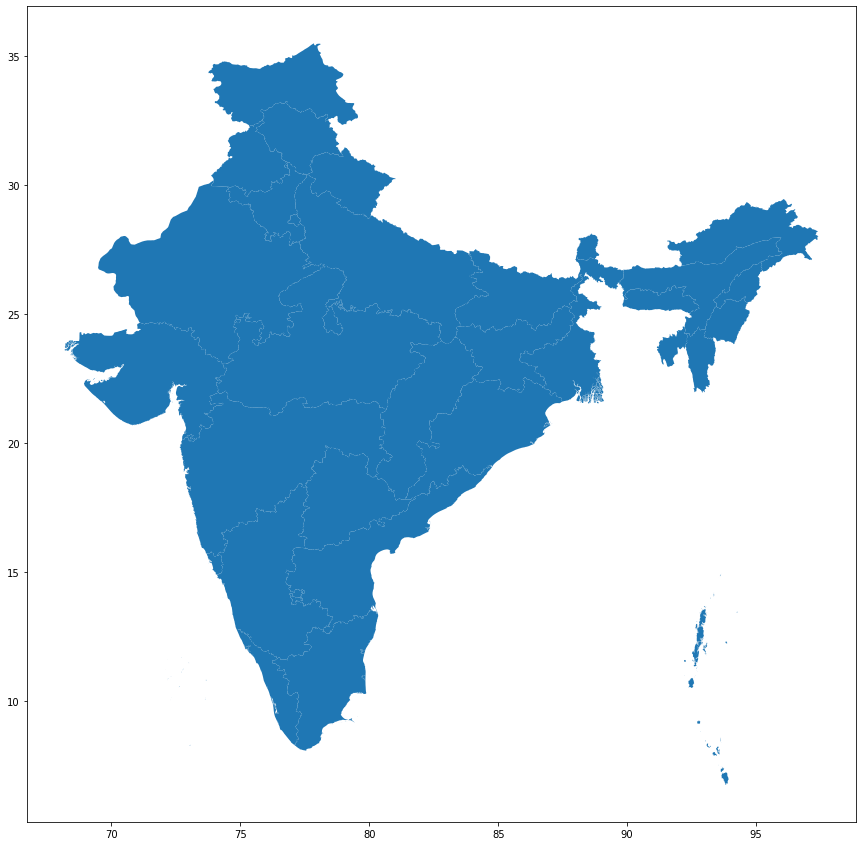

In [169]:
Indian_map = gpd.read_file('E:/Datasets/indian map shp/IND_adm1.shp')
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax)

<h2>2)Gender of user</h2>

we can use various categorical variables  such as gender ,age on these to see how it varies with the region.We encode the categorical variables as Geo-pandas takes only numbers as input.

In [170]:
geo_df.loc[geo_df['1Gender of respondent'] == 'Male' , 'Gender'] = 1 
geo_df.loc[geo_df['1Gender of respondent'] == 'Female', 'Gender'] = 0

In [171]:
geo_df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

We can see that Male users are distributed around the Delhi region while Females are localized to the region.

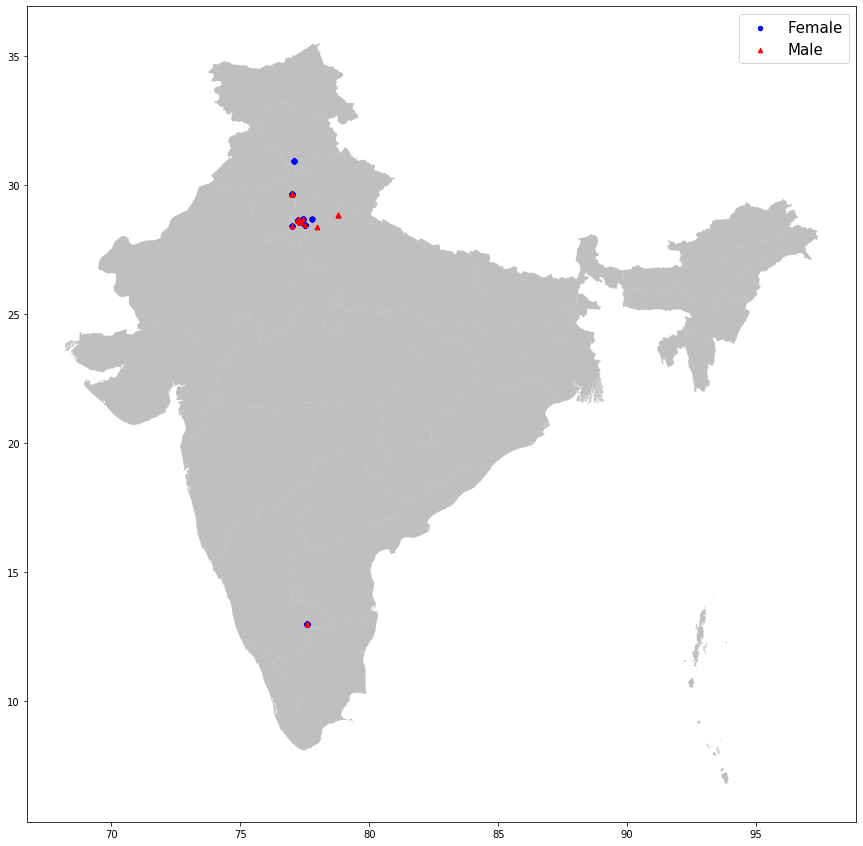

In [215]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.5,color="grey")
geo_df[geo_df['Gender']== 0].plot (ax=ax,markersize=20,color ="blue",marker="o",label = 'Female')
geo_df[geo_df['Gender']== 1].plot (ax=ax,markersize=20,color ="red",marker="^",label = 'Male')
plt.legend(prop={'size':15})

<h2>3)Usage Time<h2>

we can see that users who are using shopping websites for more than 4 years are the majority and we can plot this data to categorize them by location

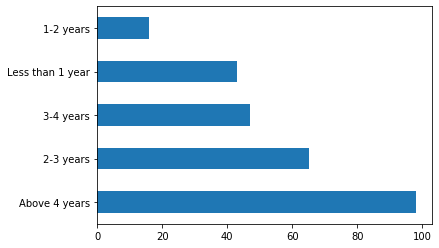

In [173]:
data['5 Since How Long You are Shopping Online ?'].value_counts().plot(kind='barh')

In [174]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
geo_df["code"] = ord_enc.fit_transform(geo_df[["5 Since How Long You are Shopping Online ?"]])


In [175]:
geo_df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

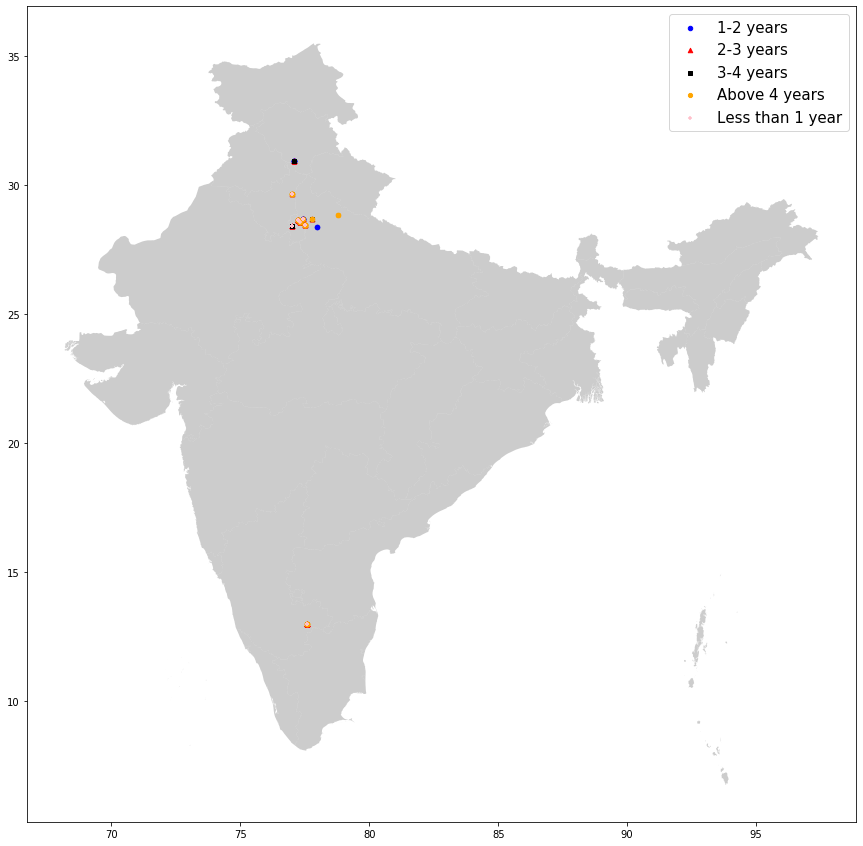

In [176]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['code']== 0].plot (ax=ax,markersize=20,color ="blue",marker="o",label = '1-2 years')
geo_df[geo_df['code']== 1].plot (ax=ax,markersize=20,color ="red",marker="^",label = '2-3 years')
geo_df[geo_df['code']== 2].plot (ax=ax,markersize=20,color ="black",marker="s",label = '3-4 years')
geo_df[geo_df['code']== 3].plot (ax=ax,markersize=20,color ="orange",marker="8",label = 'Above 4 years')
geo_df[geo_df['code']== 4].plot (ax=ax,markersize=20,color ="pink",marker="+",label = 'Less than 1 year')
plt.legend(prop={'size':15})

In [210]:
print(data.columns.tolist())

['1Genderofrespondent', '2Howoldareyou?', '3Whichcitydoyoushoponlinefrom?', '4WhatisthePinCodeofwhereyoushoponlinefrom?', '5SinceHowLongYouareShoppingOnline?', '6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?', '7Howdoyouaccesstheinternetwhileshoppingon-line?', '8Whichdevicedoyouusetoaccesstheonlineshopping?', '9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t', '10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t', '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t', '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?', '13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t', '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?', '15WhatisyourpreferredpaymentOption?\t\t\t\t\t', '16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t', '17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t', '18Thecontentonthewebsitemustbeeasytoreadandunderstand', '19Informationonsi

<h2>3)Age of user<h2>

Older users appear to be majority in the category

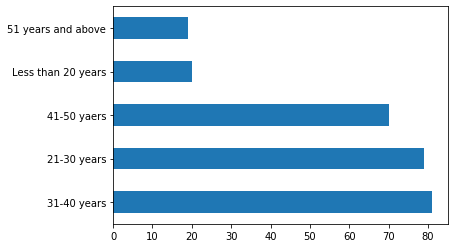

In [211]:
data['2Howoldareyou?'].value_counts().plot(kind='barh')

In [212]:
geo_df["code_two"] = ord_enc.fit_transform(geo_df[["2Howoldareyou?"]])

In [213]:
geo_df

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,4WhatisthePinCodeofwhereyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?,City?,lat,lon,geometry,Gender,code,code_three,code_four,code_five,code_two
0,Male,31-40 years,DELHI,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4

Examinig users age in vaious states of India 

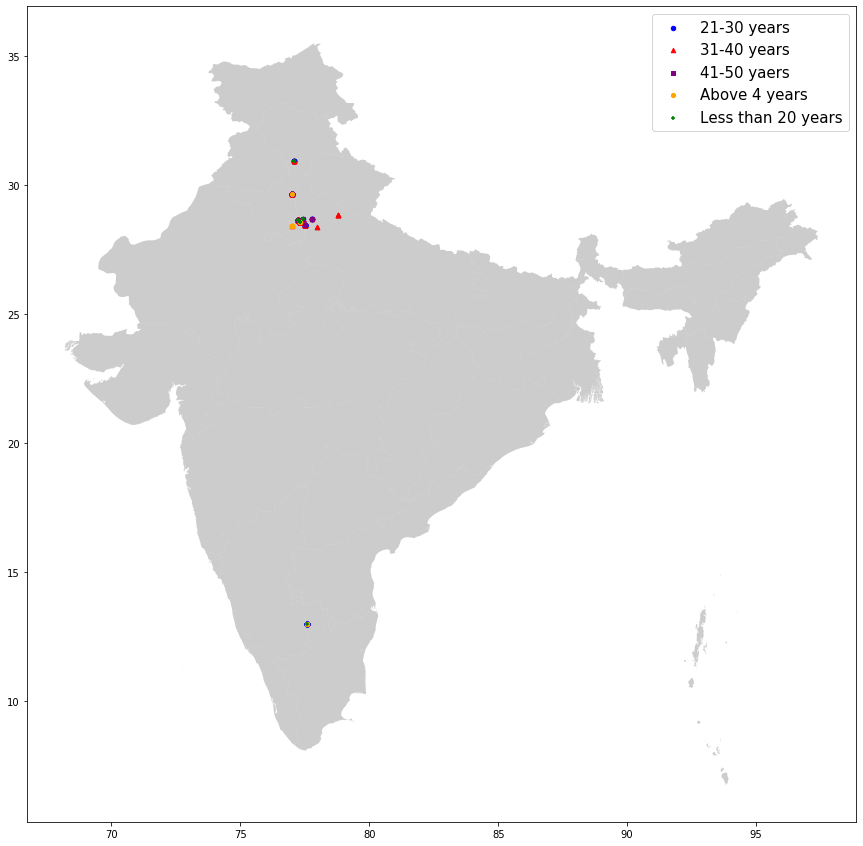

In [214]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['code_two']== 0].plot (ax=ax,markersize=20,color ="blue",marker="o",label = '21-30 years')
geo_df[geo_df['code_two']== 1].plot (ax=ax,markersize=20,color ="red",marker="^",label = '31-40 years')
geo_df[geo_df['code_two']== 2].plot (ax=ax,markersize=20,color ="purple",marker="s",label = '41-50 yaers')
geo_df[geo_df['code_two']== 3].plot (ax=ax,markersize=20,color ="orange",marker="8",label = 'Above 4 years')
geo_df[geo_df['code_two']== 4].plot (ax=ax,markersize=20,color ="green",marker="+",label = 'Less than 20 years')
plt.legend(prop={'size':15})

<h2>4)Recommendation of user(Target)</h2>

We can analyse which Online retailer the user favors and recommends to his friend.we plot the data to examine the location influence

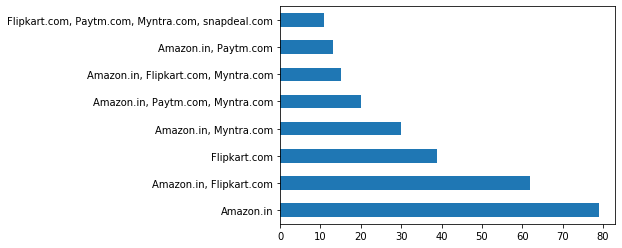

In [179]:
data['Which of the Indian online retailer would you recommend to a friend?'].value_counts().plot(kind='barh')

In [180]:
geo_df["code_three"] = ord_enc.fit_transform(geo_df[["Which of the Indian online retailer would you recommend to a friend?"]])

In [181]:
geo_df.head(20)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

While North has a mixed recommendation of all websites south remains to have flipkart,amazon to be the favored website by the Southern Users.

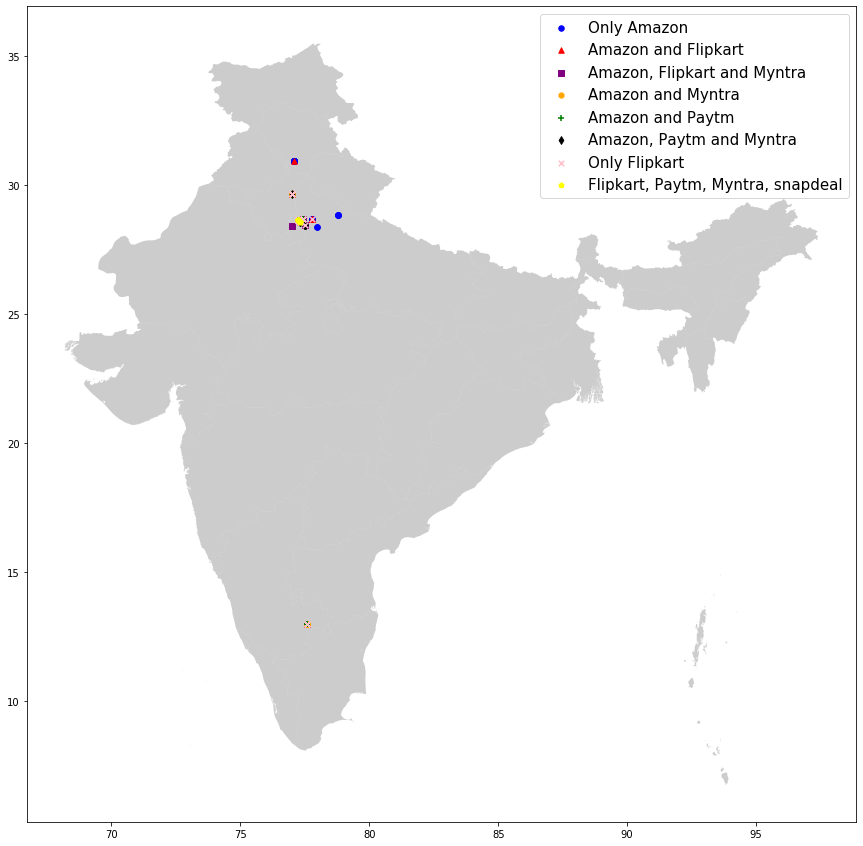

In [182]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['code_three']== 0].plot (ax=ax,markersize=30,color ="blue",marker="o",label = 'Only Amazon')
geo_df[geo_df['code_three']== 1].plot (ax=ax,markersize=30,color ="red",marker="^",label = 'Amazon and Flipkart')
geo_df[geo_df['code_three']== 2].plot (ax=ax,markersize=30,color ="purple",marker="s",label = 'Amazon, Flipkart and Myntra')
geo_df[geo_df['code_three']== 3].plot (ax=ax,markersize=30,color ="orange",marker="8",label = 'Amazon and Myntra')
geo_df[geo_df['code_three']== 4].plot (ax=ax,markersize=30,color ="green",marker="+",label = 'Amazon and Paytm')
geo_df[geo_df['code_three']== 5].plot (ax=ax,markersize=30,color ="black",marker="d",label = 'Amazon, Paytm and Myntra')
geo_df[geo_df['code_three']== 6].plot (ax=ax,markersize=30,color ="pink",marker="x",label = 'Only Flipkart')
geo_df[geo_df['code_three']== 7].plot (ax=ax,markersize=30,color ="yellow",marker="p",label = 'Flipkart, Paytm, Myntra, snapdeal')
plt.legend(prop={'size':15})

In [183]:
pd.options.display.max_columns = None

In [184]:
geo_df.head(10)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

Removing whitespace in the column names for ease of labelling

In [185]:
data.columns = data.columns.str.replace(' ', '')
geo_df.columns = geo_df.columns.str.replace(' ', '')
print(data.columns.tolist())

['1Genderofrespondent', '2Howoldareyou?', '3Whichcitydoyoushoponlinefrom?', '4WhatisthePinCodeofwhereyoushoponlinefrom?', '5SinceHowLongYouareShoppingOnline?', '6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?', '7Howdoyouaccesstheinternetwhileshoppingon-line?', '8Whichdevicedoyouusetoaccesstheonlineshopping?', '9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t', '10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t', '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t', '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?', '13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t', '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?', '15WhatisyourpreferredpaymentOption?\t\t\t\t\t', '16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t', '17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t', '18Thecontentonthewebsitemustbeeasytoreadandunderstand', '19Informationonsi

<h2>5)Preferred Payment Option<h2>

we analyse the preffered payment option of users and plot them to understand signficance of location on payment methods

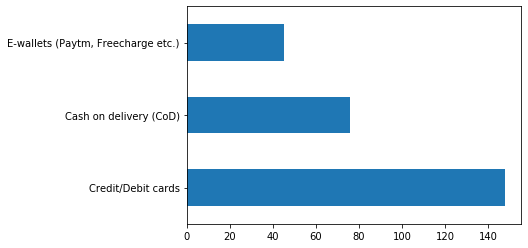

In [186]:

data['15WhatisyourpreferredpaymentOption?\t\t\t\t\t'].value_counts().plot(kind='barh')

In [187]:
geo_df["code_four"] = ord_enc.fit_transform(geo_df[["15WhatisyourpreferredpaymentOption?\t\t\t\t\t"]])

In [188]:
geo_df

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,4WhatisthePinCodeofwhereyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?,City?,lat,lon,geometry,Gender,code,code_three,code_four
0,Male,31-40 years,DELHI,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),S

Majority users prefer E-wallet payment methods while some users prefer the other methods

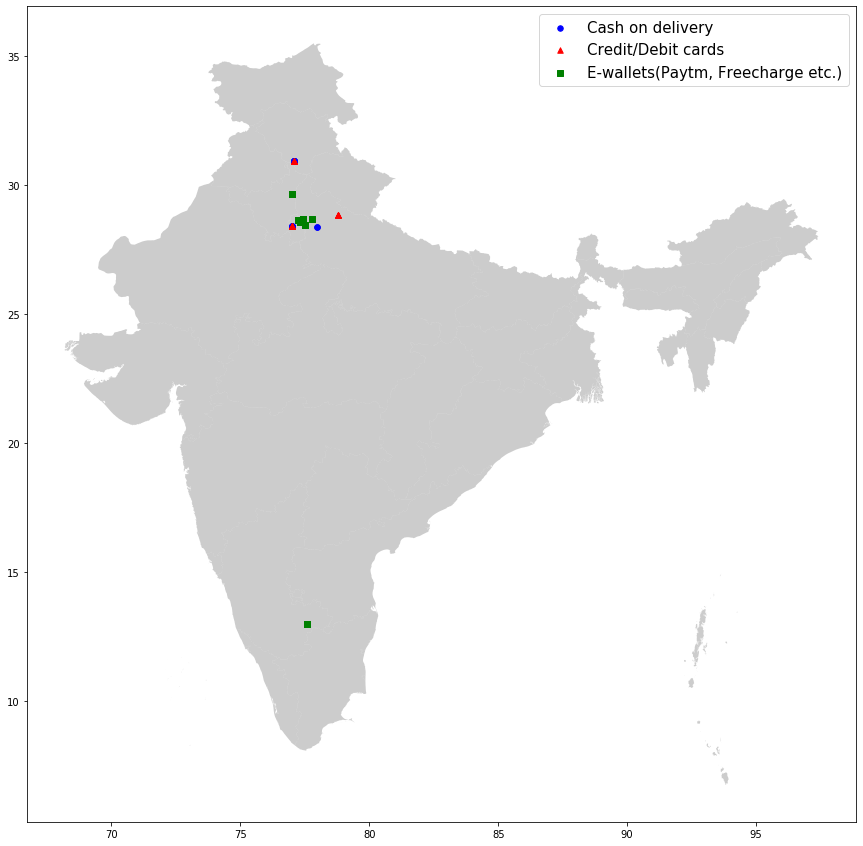

In [189]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['code_four']== 0].plot (ax=ax,markersize=30,color ="blue",marker="o",label = 'Cash on delivery')
geo_df[geo_df['code_four']== 1].plot (ax=ax,markersize=30,color ="red",marker="^",label = 'Credit/Debit cards')
geo_df[geo_df['code_four']== 2].plot (ax=ax,markersize=30,color ="green",marker="s",label = 'E-wallets(Paytm, Freecharge etc.)')
plt.legend(prop={'size':15})

<h2>6)Discovery of website/link source</h2>

we can analyse the source of visit of users to the shopping website and plot the same on the map

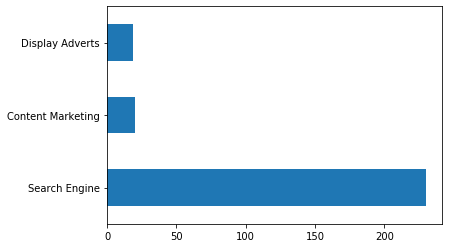

In [190]:

data['12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?'].value_counts().plot(kind='barh')

In [191]:
geo_df["code_five"] = ord_enc.fit_transform(geo_df[["12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?"]])

In [192]:
geo_df

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,4WhatisthePinCodeofwhereyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?,City?,lat,lon,geometry,Gender,code,code_three,code_four,code_five
0,Male,31-40 years,DELHI,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indiffe

Search Engine appears to be the major source for website visits followed by content marketing 

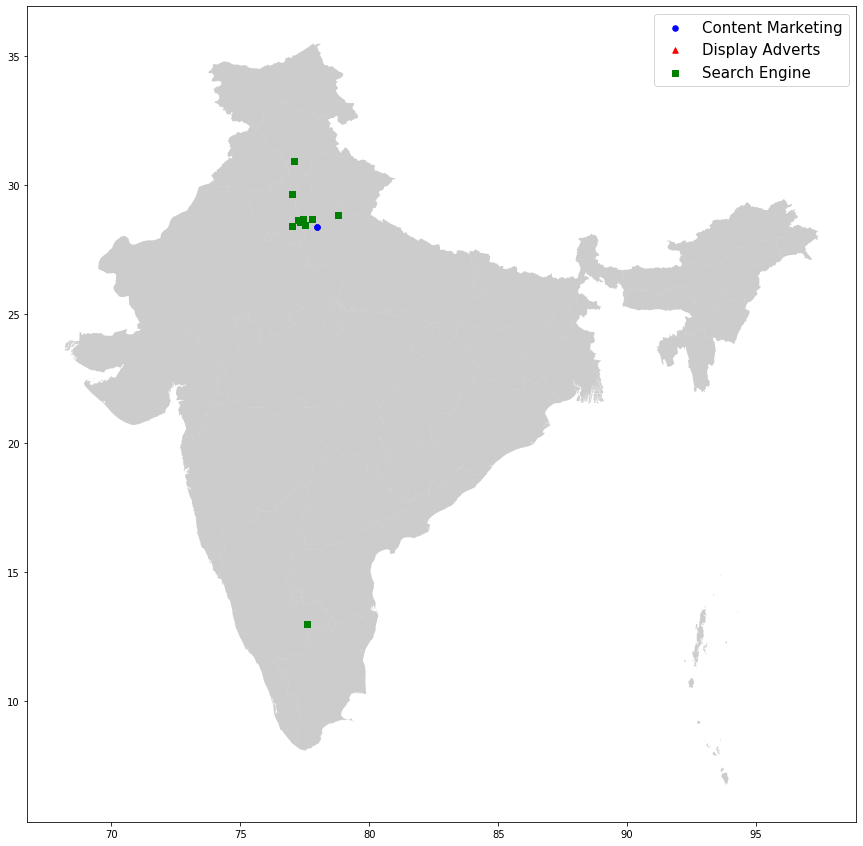

In [193]:
fig,ax = plt.subplots(figsize=(15,15))
Indian_map.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['code_five']== 0].plot (ax=ax,markersize=30,color ="blue",marker="o",label = 'Content Marketing')
geo_df[geo_df['code_five']== 1].plot (ax=ax,markersize=30,color ="red",marker="^",label = 'Display Adverts')
geo_df[geo_df['code_five']== 2].plot (ax=ax,markersize=30,color ="green",marker="s",label = 'Search Engine')
plt.legend(prop={'size':15})

<h1>PCA<h1>

To analyse which factors affect the recommendation of user we use PCA.we start by dropping the target column from the training data.

In [196]:
from sklearn.decomposition import PCA

new_train_data = data.drop(['WhichoftheIndianonlineretailerwouldyourecommendtoafriend?'],axis=1)
train_data = new_train_data.drop(['4WhatisthePinCodeofwhereyoushoponlinefrom?'],axis=1)
target_data=data['WhichoftheIndianonlineretailerwouldyourecommendtoafriend?']

In [197]:
train_data.head()

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore
0,Male,31-40 years,DELHI,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongl

we use ordinal encoder to encode the dataset to numerical variables as PCA takes only numeric variable.

In [198]:


cat=[i for i in train_data.columns if train_data[i].dtypes=='O']
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
labe=LabelEncoder()

for i in cat:
    train_data[i]=encode.fit_transform(train_data[i].values.reshape(-1,1))


target_data=labe.fit_transform(target_data)

In [199]:
train_data.head()

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore
0,1.0,1.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,7.0,9.0,7.0,5.0,10.0,9.0,9.0,8.0,9.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,3.0,5.0,0.0,3.0,2.0,0.0,0.0
1,0.0,0.0,2.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,2.0,4.0,4.0,1.0,3.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,5.0,6.0,2.0,2.0,8.0,2.0,2.0,1.0,9.0,9.0,8.0,2.0,1.0,6.0,7.0,10.0,7.0,5.0,0.0,4.0,1.0
2,0.0,0.0,4.0,2.0,3.0,1.0,2.0,2.0,0.0,0.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,0.

In [200]:
data["WhichoftheIndianonlineretailerwouldyourecommendtoafriend?_code_six"] = ord_enc.fit_transform(data[["WhichoftheIndianonlineretailerwouldyourecommendtoafriend?"]])

In [201]:
data

,1Genderofrespondent,2Howoldareyou?,3Whichcitydoyoushoponlinefrom?,4WhatisthePinCodeofwhereyoushoponlinefrom?,5SinceHowLongYouareShoppingOnline?,6Howmanytimesyouhavemadeanonlinepurchaseinthepast1year?,7Howdoyouaccesstheinternetwhileshoppingon-line?,8Whichdevicedoyouusetoaccesstheonlineshopping?,9Whatisthescreensizeofyourmobiledevice?\t\t\t\t\t\t,10Whatistheoperatingsystem(OS)ofyourdevice?\t\t\t\t,11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?\t\t\t,12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?,"13Afterfirstvisit,howdoyoureachtheonlineretailstore?\t\t\t\t",14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?,15WhatisyourpreferredpaymentOption?\t\t\t\t\t,16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?\t\t\t\t\t\t\t,"17Whydidyouabandonthe“Bag”,“ShoppingCart”?\t\t\t\t\t",18Thecontentonthewebsitemustbeeasytoreadandunderstand,19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison,20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.,21Allrelevantinformationonlistedproductsmustbestatedclearly,22Easeofnavigationinwebsite,23Loadingandprocessingspeed,24UserfriendlyInterfaceofthewebsite,25ConvenientPaymentmethods,26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime,27Empathy(readinesstoassistwithqueries)towardsthecustomers,28Beingabletoguaranteetheprivacyofthecustomer,"29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)",30Onlineshoppinggivesmonetarybenefitanddiscounts,31Enjoymentisderivedfromshoppingonline,32Shoppingonlineisconvenientandflexible,33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision,34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline,35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers,36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication,37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction,38Usersatisfactioncannotexistwithouttrust,39Offeringawidevarietyoflistedproductinseveralcategory,40Provisionofcompleteandrelevantproductinformation,41Monetarysavings,42TheConvenienceofpatronizingtheonlineretailer,43Shoppingonthewebsitegivesyouthesenseofadventure,44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus,45Youfeelgratificationshoppingonyourfavoritee-tailer,46Shoppingonthewebsitehelpsyoufulfillcertainroles,47Gettingvalueformoneyspent,"Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;",Easytousewebsiteorapplication,Visualappealingweb-pagelayout,Wildvarietyofproductonoffer,"Complete,relevantdescriptioninformationofproducts",Fastloadingwebsitespeedofwebsiteandapplication,Reliabilityofthewebsiteorapplication,Quicknesstocompletepurchase,Availabilityofseveralpaymentoptions,Speedyorderdelivery,Privacyofcustomers’information,Securityofcustomerfinancialinformation,PerceivedTrustworthiness,Presenceofonlineassistancethroughmulti-channel,"Longertimetogetloggedin(promotion,salesperiod)","Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)","Latedeclarationofprice(promotion,salesperiod)","Longerpageloadingtime(promotion,salesperiod)","Limitedmodeofpaymentonmostproducts(promotion,salesperiod)",Longerdeliveryperiod,Changeinwebsite/Applicationdesign,Frequentdisruptionwhenmovingfromonepagetoanother,Websiteisasefficientasbefore,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?_code_six
0,Male,31-40 years,DELHI,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indiff

Analysing correlation of training data to target data 



E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


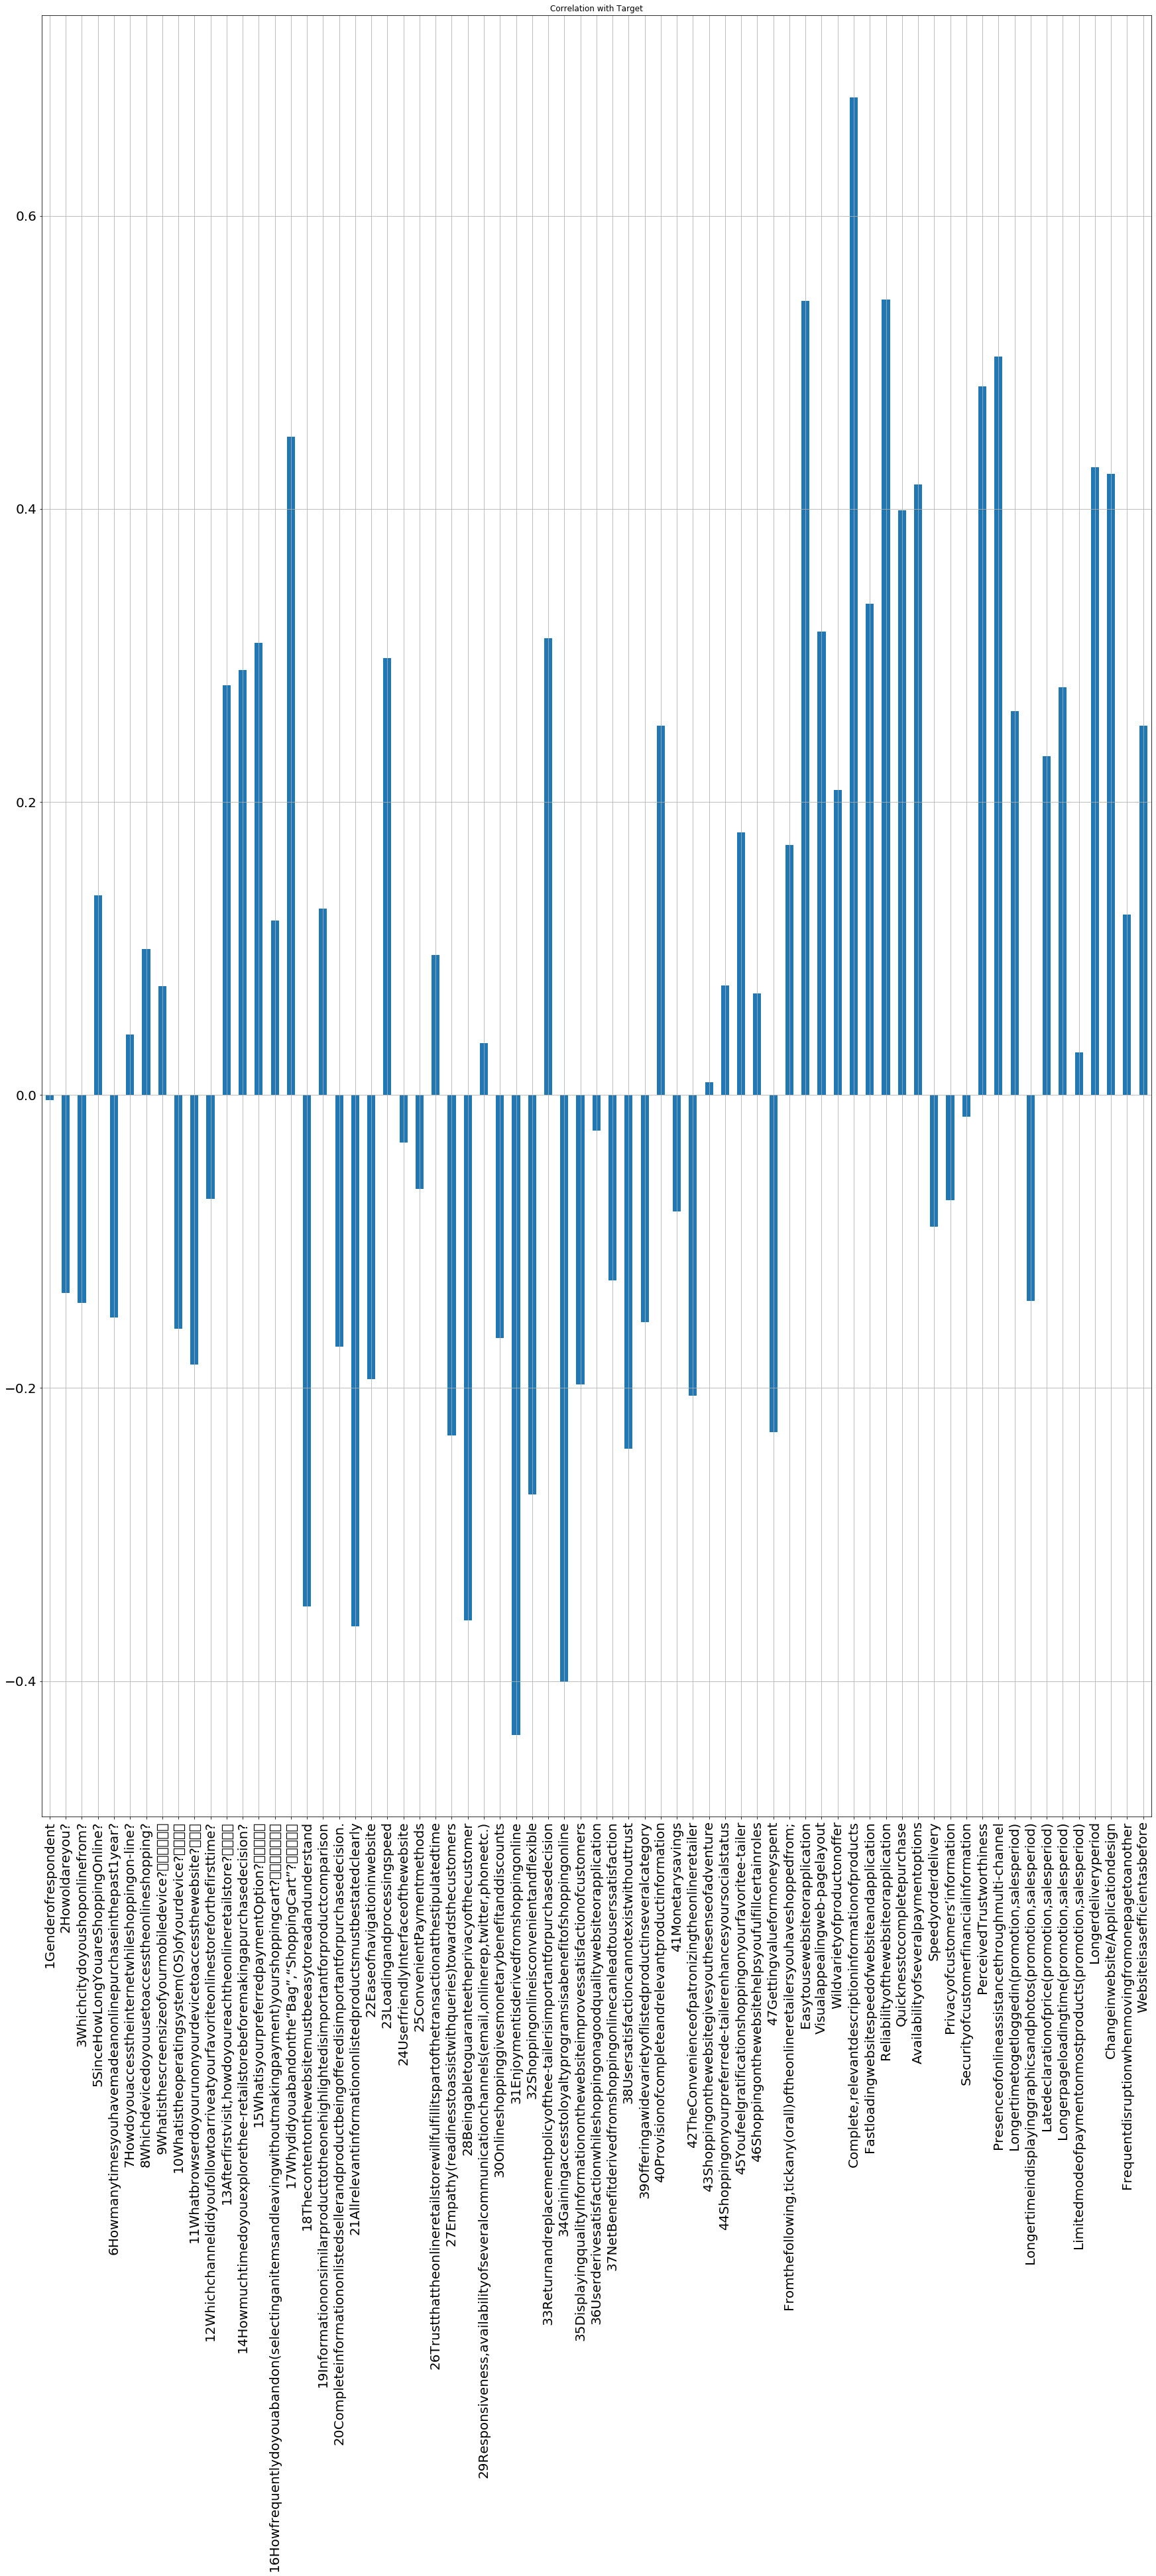

In [202]:
train_data.corrwith(data['WhichoftheIndianonlineretailerwouldyourecommendtoafriend?_code_six']).plot.bar(
        figsize = (30, 50), title = "Correlation with Target", fontsize = 20,
        rot = 90, grid = True)

In [203]:
target_data

array([6, 3, 5, 1, 3, 4, 7, 0, 0, 6, 0, 1, 2, 1, 5, 1, 3, 4, 7, 1, 3, 0,
       0, 6, 0, 1, 2, 1, 5, 1, 3, 6, 3, 5, 1, 3, 4, 7, 0, 0, 6, 0, 1, 2,
       6, 3, 5, 1, 1, 3, 4, 7, 0, 0, 0, 6, 0, 1, 2, 6, 3, 5, 1, 1, 0, 0,
       6, 3, 5, 1, 0, 6, 1, 2, 1, 0, 0, 3, 5, 3, 4, 0, 0, 1, 0, 6, 0, 1,
       0, 7, 6, 1, 6, 1, 5, 3, 4, 0, 6, 1, 2, 1, 0, 0, 1, 0, 6, 0, 1, 7,
       0, 0, 0, 6, 3, 5, 3, 4, 0, 6, 1, 2, 1, 0, 0, 1, 0, 6, 0, 1, 7, 0,
       0, 0, 6, 0, 4, 0, 5, 1, 7, 1, 3, 0, 6, 3, 2, 1, 2, 3, 2, 1, 2, 1,
       1, 1, 0, 0, 0, 3, 6, 6, 3, 6, 1, 5, 1, 5, 1, 1, 5, 1, 6, 6, 6, 0,
       4, 4, 0, 0, 0, 0, 0, 0, 3, 3, 6, 5, 1, 1, 1, 7, 1, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 6, 6, 6, 0, 6, 0, 0, 1, 5, 1,
       5, 1, 1, 5, 1, 5, 1, 1, 1, 7, 1, 0, 0, 0, 3, 6, 6, 3, 6, 6, 1, 1,
       2, 3, 2, 1, 2, 1, 3, 3, 6, 0, 1, 7, 2, 0, 1, 6, 3, 1, 4, 5, 3, 0,
       0, 6, 0, 0, 0])

Component Value is limited to 2

In [204]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_data.values)

Variance of the PCA components is labelled to represent the % of data included in the components

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


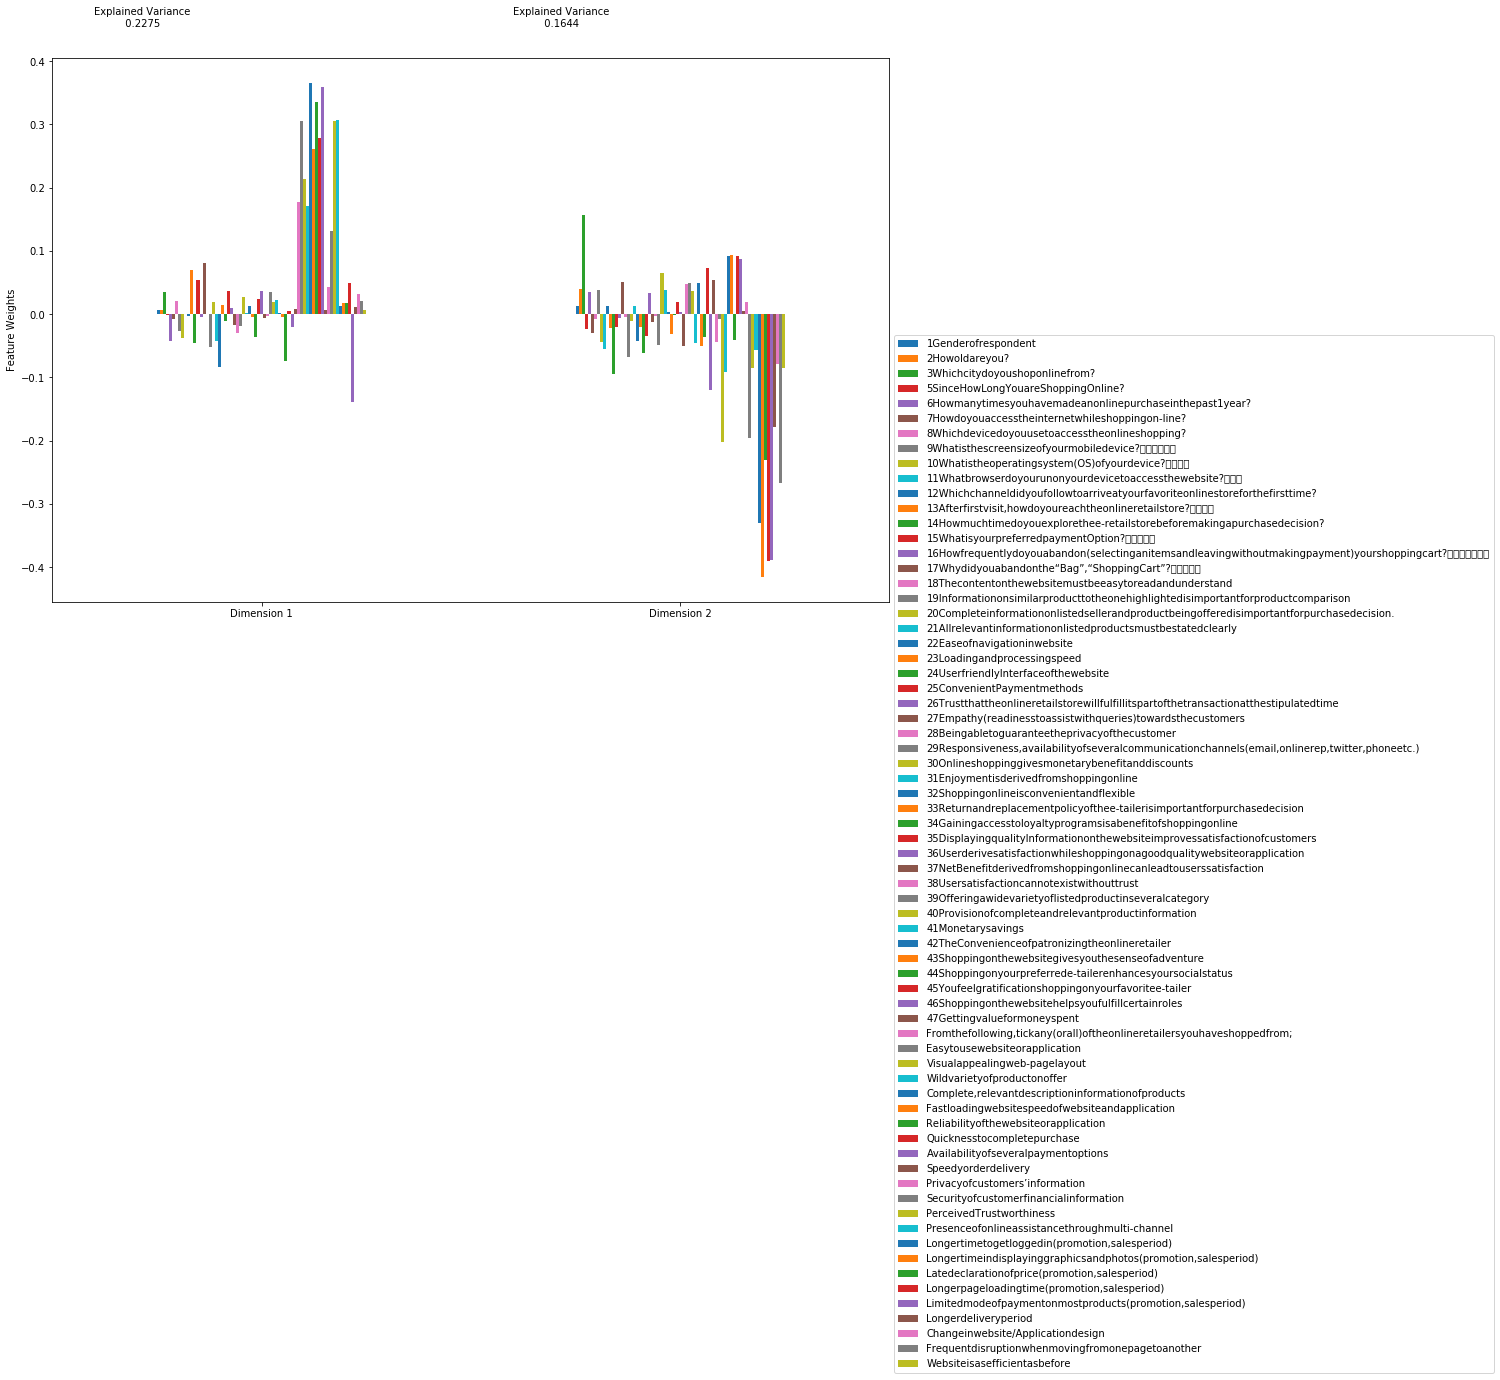

In [205]:
def pca_results(good_data, pca):

    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]


    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions


    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions


    fig, ax = plt.subplots(figsize = (15,10))


    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)



    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))


    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(train_data, pca)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

<h6>Component 1</h6>

We can see the factors that majorly affect the recommendation of user:


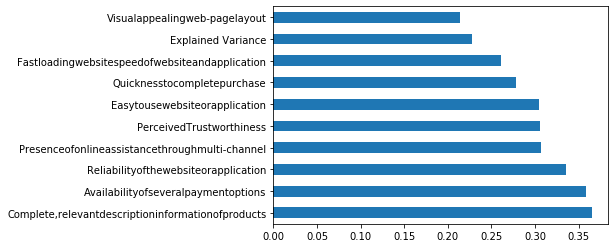

In [206]:
pca_results.max().nlargest(10).plot(kind='barh')

<h6>Component 2</h6>

Recommendation of Users who fall under this component is greatly influenced by the city of the user